<a href="https://colab.research.google.com/github/tausifshareff/Data-Science/blob/master/Marketing_Segment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialize

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Loading the datasets from all 4 sheets

In [0]:
customer_segment = pd.read_excel("drive/Colab Notebooks/ThinkRobots 2019.xlsx", sheet_name="Customer Segments")
customer_names = pd.read_excel("drive/Colab Notebooks/ThinkRobots 2019.xlsx", sheet_name="Customer Names")
billing_status = pd.read_excel("drive/Colab Notebooks/ThinkRobots 2019.xlsx", sheet_name="Billing Status")
maj_prod_change = pd.read_excel("drive/Colab Notebooks/ThinkRobots 2019.xlsx", sheet_name="Major Product Changes")

# Describe Data

We need to read the initial data

In [0]:
customer_segment.head()
print("Shape of the customer_segment: ")
customer_segment.shape

,Customer ID,Free Account Created Date,Last Seen,Session Count,Segment,Billing Account #
0,1,2017-05-29,2019-04-05 08:02:32,1379,Marketing Segment 2,AX#93195
1,2,2017-12-17,2019-04-27 13:23:56,531,Marketing Segment 1,AX#20438
2,3,2017-01-30,2019-04-22 15:38:09,317,Marketing Segment 1,AX#60779
3,4,2017-02-03,2019-04-23 16:30:46,349,Marketing Segment 1,AX#91209
4,5,2017-03-18,2019-04-05 13:16:33,1158,Marketing Segment 2,AX#57000


Shape of the customer_segment: 


(1000, 6)

In [0]:
# Print number of unique customer IDs
customer_segment[['Customer ID']].nunique()
# Print number of unique 
customer_segment[['Billing Account #']].nunique()

Customer ID    1000
dtype: int64

Billing Account #    993
dtype: int64

We seen that there are 7 customers that are using a billing accounts that are already used by some other customer.

# Question 1
### Which of the existing marketing segments is the most effective? 

In [0]:
segment = customer_segment.groupby('Segment').sum()
segment = segment.drop('Customer ID', axis = 1)

In [0]:
segment

,Session Count
Segment,
Marketing Segment 1,93141
Marketing Segment 2,177972
Marketing Segment 3,39862


<BarContainer object of 3 artists>

([<matplotlib.axis.XTick at 0x7f4dbc2b3470>,
 <a list of 3 Text xticklabel objects>)

Text(0.5, 1.0, 'Marketing Segments v/s Session Counts')

Text(0.5, 0, 'Segments')

Text(0, 0.5, 'Session Counts')

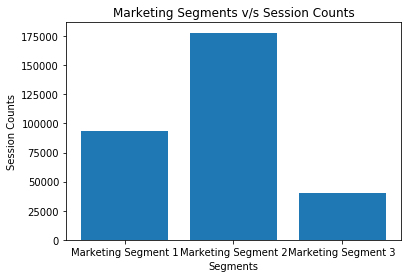

<Figure size 432x288 with 0 Axes>

In [0]:
seg_label = np.array(segment.index)
sessions = segment.iloc[:, 0]
pos = range(len(segment.index))

plt.bar(pos, sessions, align = 'center')
plt.xticks(pos, seg_label)
plt.title("Marketing Segments v/s Session Counts")
plt.xlabel("Segments")
plt.ylabel("Session Counts")
plt.show()
plt.savefig("drive/Colab Notebooks/segment_session.png")

By simply looking at the Session Counts for every marketing segment, we can say that Marketing Segment 2 is the most effective. However it does not give such a clear picture. There are other factors that need to be considered like ROMI (Return On Marketing Investing).

We need to ask if the marketing segment really is profitable?

In [0]:
# merging billing_status and customer_segment
customer_romi = pd.merge(customer_segment, billing_status, on = 'Billing Account #')

In [0]:
customer_romi.head()
customer_romi.info()

,Customer ID,Free Account Created Date,Last Seen,Session Count,Segment,Billing Account #,Account Status,Upgraded Account Created Date,Upgraded Account Cancelled Date,Total Charges
0,1,2017-05-29,2019-04-05 08:02:32,1379,Marketing Segment 2,AX#93195,paying,2019-04-02,NaT,145.600000
1,2,2017-12-17,2019-04-27 13:23:56,531,Marketing Segment 1,AX#20438,paying,2018-11-11,NaT,728.000000
2,3,2017-01-30,2019-04-22 15:38:09,317,Marketing Segment 1,AX#60779,paying,2019-03-15,NaT,277.200000
3,4,2017-02-03,2019-04-23 16:30:46,349,Marketing Segment 1,AX#91209,paying,2019-03-24,NaT,292.833333
4,5,2017-03-18,2019-04-05 13:16:33,1158,Marketing Segment 2,AX#57000,paying,2018-10-12,NaT,462.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014 entries, 0 to 1013
Data columns (total 10 columns):
Customer ID                        1014 non-null int64
Free Account Created Date          1014 non-null datetime64[ns]
Last Seen                          1014 non-null datetime64[ns]
Session Count                      1014 non-null int64
Segment                            1014 non-null object
Billing Account #                  1014 non-null object
Account Status                     1014 non-null object
Upgraded Account Created Date      1014 non-null datetime64[ns]
Upgraded Account Cancelled Date    123 non-null datetime64[ns]
Total Charges                      1014 non-null float64
dtypes: datetime64[ns](4), float64(1), int64(2), object(3)
memory usage: 87.1+ KB


In [0]:
type(pd._libs.tslibs.nattype.NaT)

pandas._libs.tslibs.nattype.NaTType

We see that there are additional 14 **Billing Account #** that weren't account for by Customer Segment table.

,Total Charges
Segment,
Marketing Segment 1,"172,857.37"
Marketing Segment 2,"230,341.37"
Marketing Segment 3,"165,500.03"


<BarContainer object of 3 artists>

([<matplotlib.axis.XTick at 0x7f4dbc699860>,
 <a list of 3 Text xticklabel objects>)

Text(0.5, 1.0, 'Marketing Segments v/s Total Charges')

Text(0.5, 0, 'Segments')

Text(0, 0.5, 'Total Charges')

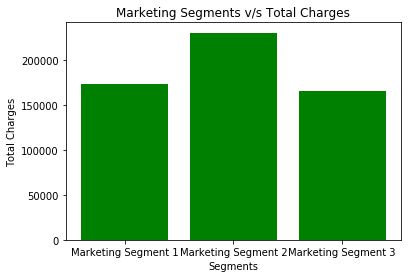

<Figure size 432x288 with 0 Axes>

In [0]:
pd.options.display.float_format = '{:,.2f}'.format
profit = customer_romi.groupby(['Segment']).sum()
profit.drop(['Customer ID', 'Session Count'], axis = 1)

seg_label = np.array(profit.index)
charges = profit.iloc[:, 2]
pos = range(len(profit.index))

plt.bar(pos, charges, align = 'center', color = 'green')
plt.xticks(pos, seg_label)
plt.title("Marketing Segments v/s Total Charges")
plt.xlabel("Segments")
plt.ylabel("Total Charges")
plt.show()
plt.savefig("drive/Colab Notebooks/segment_totcharge.png")

Observe that even based on the total charges for each **Billing Account #** that belongs to a certain  **Marketing Segment**, the 'Marketing Segment 2' is most profitable. Hence we can conclude that it is most effective as it has given maximum ROMI (Return On Marketing Investment).

Therefore, the Makreting team of ThinkRobots could possibly focus on Marketing Segment 2 for better sales and revenue.

In [0]:
print(" Average revenue from Segment 1: %d" % customer_romi[customer_romi['Segment'] == 'Marketing Segment 1']['Total Charges'].mean())
print(" Average revenue from Segment 2: %d" % customer_romi[customer_romi['Segment'] == 'Marketing Segment 2']['Total Charges'].mean())
print(" Average revenue from Segment 3: %d" % customer_romi[customer_romi['Segment'] == 'Marketing Segment 3']['Total Charges'].mean())

 Average revenue from Segment 1: 669
 Average revenue from Segment 2: 565
 Average revenue from Segment 3: 474


In [0]:
print(" Average sessions from Segment 1: %d" % customer_romi[customer_romi['Segment'] == 'Marketing Segment 1']['Session Count'].mean())
print(" Average sessions from Segment 2: %d" % customer_romi[customer_romi['Segment'] == 'Marketing Segment 2']['Session Count'].mean())
print(" Average sessions from Segment 3: %d" % customer_romi[customer_romi['Segment'] == 'Marketing Segment 3']['Session Count'].mean())

 Average sessions from Segment 1: 371
 Average sessions from Segment 2: 437
 Average sessions from Segment 3: 114


However we see that Segment 1 has higher average revenue (per customer) than Segment 2.

This could mean that although Segment 2 comprise of higher volume of sale, Segment 1 have more willingness to pay for our services.

,# of Customers
Segment,
Marketing Segment 1,254
Marketing Segment 2,402
Marketing Segment 3,344


<BarContainer object of 3 artists>

([<matplotlib.axis.XTick at 0x7f4dbc265c50>,
 <a list of 3 Text xticklabel objects>)

Text(0.5, 1.0, 'Marketing Segments v/s No. of Customers')

Text(0.5, 0, 'Segments')

Text(0, 0.5, '# of Customers')

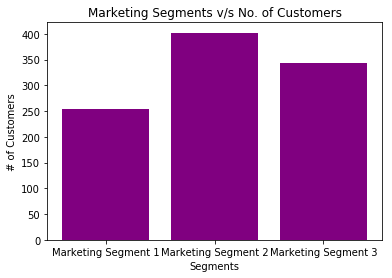

<Figure size 432x288 with 0 Axes>

In [0]:
#@title Default title text
segment_customers = customer_segment.groupby('Segment').count()
#segment_customers.drop(['Free Account Created Date', 'Last Seen', 'Session Count', 'Billing Account #'], axis = 1)
segment_customers = segment_customers.rename(index = str, columns={'Customer ID': '# of Customers'})
segment_customers.drop(['Free Account Created Date', 'Last Seen', 'Session Count', 'Billing Account #'], axis = 1)

seg_label = np.array(segment_customers.index)
customers = segment_customers.iloc[:, 0]
pos = range(len(segment_customers.index))

plt.bar(pos, customers, align = 'center', color = 'purple')
plt.xticks(pos, seg_label)
plt.title("Marketing Segments v/s No. of Customers")
plt.xlabel("Segments")
plt.ylabel("# of Customers")
plt.show()
plt.savefig("drive/Colab Notebooks/segment_customers.png")

So based of the following factors - 

- \# of customers in each segment.
- Sessions per segment.
- ROMI per segment.

**Marketing Segment 2** is by far the most effective customer segment.

# Question 2
### The team is considering running a test campaign on Facebook ads. How  should they decide if it’s a success?  

## Finding measurement factors for a successful Facebook Test Campaign:

Based on the sample data we have the following information which could be useful:

- \# of Customers (Customer IDs)
- Customer Segments
- Free Account Created Date
- Upgraded Account Created Date
- Total Charges per Billing Account #

Based on the sample dataset provided we could classify a test campaign as successful using the above **measurement factors**.


**Goal:** To increase revenue and sales.


**Observations:**

- All the customers that had created a free account, upgraded their accounts undeniably. This means they liked the features of our service.
- More 'sessions' a customer has more likely she/he is to stay loyal. As these customers are getting more **value** out of our product.
- **Segment 2** is the most effective in terms of revenue, sales (# of customers) and usage trends (sessions per customer).
- Every customer has her/his own time frame in which they convert to upgraded services.

**Evaluation of a successful campaign can be done if following results are obtained from the campaign:**

- Trivially, if we attract large number of customers then its a positive sign.
- More customers from Segment 2 create accounts targetted by our campaign.
- Customers derive more value by creating more sessions with our service. If customers attracted create more sessions then it's a positive sign.
- If time frame in which customers switch from free to upgraded subscription becomes less.
- Average **Total Charges** per customer should be 550 to 650 (Segment 1 has max. average total charge of 669 per customer).

### Therefore, based on the measurement factors and observations, we can evaluate the Facebook test campaign as successful if the campaign generates more revenue and sales.

### This goal can be achieved if we obtain the above stated results.

# Question 3
### Any other advice?

In [0]:
#nat = np.datetime64('NaT')
churn = customer_romi['Customer ID'].count() - customer_romi[pd.isnull(customer_romi['Upgraded Account Cancelled Date'])]['Customer ID'].count()
current = customer_romi[pd.isnull(customer_romi['Upgraded Account Cancelled Date'])]['Customer ID'].count()
print('Customers that cancelled their upgraded service: %d' % churn)
current/customer_romi['Customer ID'].count()

Customers that cancelled their upgraded service: 123


0.878698224852071

So out of **1014 Accounts** of cutomers, **123 Accounts** have *deactivated* their upgraded service.

<Figure size 720x504 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7f4dbc6e2048>,
 [Text(-1.1951824874946662, 0.5114086639724266, 'Churned Customer'),
  Text(1.0113082687781187, -0.4327303843052907, 'Current Customer')],
 [Text(-0.7354969153813329, 0.3147130239830317, '12.1%'),
  Text(0.551622692060792, -0.23603475507561306, '87.9%')])

Text(0.5, 1.0, 'Churn Rate Of The Customers')

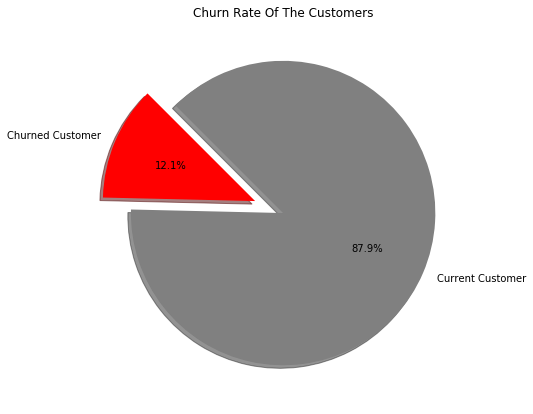

<Figure size 432x288 with 0 Axes>

In [0]:
vals = np.array([churn, current])
colors = ['red', 'grey']
labels = ['Churned Customer', 'Current Customer']
plt.figure(figsize=(10,7))
plt.pie(vals, explode = [0.2, 0], colors= colors, shadow=True, labels = labels, startangle=135, autopct='%1.1f%%')
plt.title('Churn Rate Of The Customers')
#plt.legend(loc = 'lower right')
plt.show()
plt.savefig("drive/Colab Notebooks/churn_rate_customers.png")

In [0]:
customer_romi['Churned'] = None

In [0]:
customer_romi['Churned'] = np.where(customer_romi['Upgraded Account Cancelled Date'].isin([pd._libs.tslibs.nattype.NaT]), 0, 1)
customer_romi.head()

,Customer ID,Free Account Created Date,Last Seen,Session Count,Segment,Billing Account #,Account Status,Upgraded Account Created Date,Upgraded Account Cancelled Date,Total Charges,Churned
0,1,2017-05-29,2019-04-05 08:02:32,1379,Marketing Segment 2,AX#93195,paying,2019-04-02,NaT,145.60,0
1,2,2017-12-17,2019-04-27 13:23:56,531,Marketing Segment 1,AX#20438,paying,2018-11-11,NaT,728.00,0
2,3,2017-01-30,2019-04-22 15:38:09,317,Marketing Segment 1,AX#60779,paying,2019-03-15,NaT,277.20,0
3,4,2017-02-03,2019-04-23 16:30:46,349,Marketing Segment 1,AX#91209,paying,2019-03-24,NaT,292.83,0
4,5,2017-03-18,2019-04-05 13:16:33,1158,Marketing Segment 2,AX#57000,paying,2018-10-12,NaT,462.00,0


In [0]:
dum_customer_romi = pd.concat([customer_romi, pd.get_dummies(customer_romi['Segment'])], axis = 1)

In [0]:
dum_customer_romi.head()

,Customer ID,Free Account Created Date,Last Seen,Session Count,Segment,Billing Account #,Account Status,Upgraded Account Created Date,Upgraded Account Cancelled Date,Total Charges,Churned,Marketing Segment 1,Marketing Segment 2,Marketing Segment 3
0,1,2017-05-29,2019-04-05 08:02:32,1379,Marketing Segment 2,AX#93195,paying,2019-04-02,NaT,145.60,0,0,1,0
1,2,2017-12-17,2019-04-27 13:23:56,531,Marketing Segment 1,AX#20438,paying,2018-11-11,NaT,728.00,0,1,0,0
2,3,2017-01-30,2019-04-22 15:38:09,317,Marketing Segment 1,AX#60779,paying,2019-03-15,NaT,277.20,0,1,0,0
3,4,2017-02-03,2019-04-23 16:30:46,349,Marketing Segment 1,AX#91209,paying,2019-03-24,NaT,292.83,0,1,0,0
4,5,2017-03-18,2019-04-05 13:16:33,1158,Marketing Segment 2,AX#57000,paying,2018-10-12,NaT,462.00,0,0,1,0


In [0]:
Y = dum_customer_romi['Churned'].values
X = dum_customer_romi.drop(['Billing Account #', 'Churned', 'Account Status', 'Upgraded Account Created Date', 'Upgraded Account Cancelled Date', 'Last Seen', 'Customer ID', 'Free Account Created Date', 'Segment'], axis = 1)

In [0]:
X.head()

,Session Count,Total Charges,Marketing Segment 1,Marketing Segment 2,Marketing Segment 3
0,1379,145.60,0,1,0
1,531,728.00,1,0,0
2,317,277.20,1,0,0
3,349,292.83,1,0,0
4,1158,462.00,0,1,0


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [0]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(Y_test, prediction_test))

0.8472906403940886


Churned Segment 1 customers: 17
Churned Segment 2 customers: 57
Churned Segment 3 customers: 49


([<matplotlib.patches.Wedge at 0x7f4db5e39b00>,
 [Text(-1.0422483998638292, 0.38186158877437254, 'Segment 1'),
  Text(-0.036709495616865734, -1.1494139432474078, 'Segment 2'),
  Text(0.49887065463021585, 0.991578574772983, 'Segment 3')],
 [Text(-0.572767138663906, 0.20985186410123172, '13.8%'),
  Text(-0.020748845348663236, -0.6496687505311436, '46.3%'),
  Text(0.274154143535524, 0.544921559109477, '39.8%')])

Text(0.5, 1.0, 'Churn Rate Of The Customer Segments')

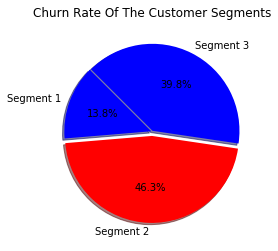

<Figure size 432x288 with 0 Axes>

In [0]:
print('Churned Segment 1 customers: %d' % customer_romi[(customer_romi['Segment'] == 'Marketing Segment 1') & (customer_romi['Churned'] == 1)].shape[0])
print('Churned Segment 2 customers: %d' % customer_romi[(customer_romi['Segment'] == 'Marketing Segment 2') & (customer_romi['Churned'] == 1)].shape[0])
print('Churned Segment 3 customers: %d' % customer_romi[(customer_romi['Segment'] == 'Marketing Segment 3') & (customer_romi['Churned'] == 1)].shape[0])

vals = np.array([customer_romi[(customer_romi['Segment'] == 'Marketing Segment 1') & (customer_romi['Churned'] == 1)].shape[0], customer_romi[(customer_romi['Segment'] == 'Marketing Segment 2') & (customer_romi['Churned'] == 1)].shape[0], customer_romi[(customer_romi['Segment'] == 'Marketing Segment 3') & (customer_romi['Churned'] == 1)].shape[0]])
colors = ['blue', 'red', 'blue']
labels = ['Segment 1', 'Segment 2', 'Segment 3']
plt.pie(vals, explode = [0.01, 0.05, 0.01], colors= colors, shadow=True, labels = labels, startangle=135, autopct='%1.1f%%')
plt.title('Churn Rate Of The Customer Segments')
#plt.legend(loc = 'lower right')
plt.show()
plt.savefig("drive/Colab Notebooks/churnrate_segment.png")

In [0]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
 index=X.columns.values)
weights.sort_values(ascending = False)

Total Charges          0.00
Session Count         -0.01
Marketing Segment 2   -0.12
Marketing Segment 3   -0.40
Marketing Segment 1   -0.86
dtype: float64

Based on the model Customers in Segment 1 are least likely to churn and customers in Segment 2 are more likely to churn in comparison to Segment 1.

The Accuracy of our model is 84.72%.

We may be missing some more significant features that we are not accounting for in our model.